In [3]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("HR.csv")
dp_indices = df.groupby(by="sales").indices
dp_indices

{'IT': array([   61,    62,    63, ..., 14932, 14933, 14938], dtype=int64),
 'RandD': array([  301,   302,   303,   304,   305,   453,   454,   455,   456,
          457,   605,   606,   607,   608,   609,   833,   834,   835,
          836,   837,   985,   986,   987,   988,   989,  1061,  1062,
         1063,  1064,  1065,  1217,  1218,  1219,  1291,  1292,  1293,
         1294,  1295,  1296,  1368,  1369,  1370,  1371,  1372,  1373,
         1445,  1446,  1447,  1448,  1449,  1450,  1522,  1523,  1524,
         1525,  1526,  1598,  1599,  1600,  1601,  1602,  1675,  1676,
         1677,  1678,  1679,  1751,  1752,  1753,  1754,  1755,  1827,
         1828,  1829,  1830,  1831,  1903,  1904,  1905,  1906,  1907,
         1979,  1980,  1981,  1982,  1983,  2055,  2056,  2057,  2058,
         2059,  2131,  2132,  2133,  2134,  2135,  2207,  2208,  2209,
         2210,  2211,  2283,  2284,  2285,  2286,  2287,  2359,  2360,
         2361,  2362,  2363,  2435,  2436,  2437,  2438,  2439,

In [15]:
sales_values = df["left"].iloc[dp_indices["sales"]].values
technical_values = df["left"].iloc[dp_indices["technical"]].values
ss.ttest_ind(sales_values,technical_values)[1]

0.2891069046174478

dict_keys(['IT', 'RandD', 'accounting', 'hr', 'management', 'marketing', 'product_mng', 'sales', 'support', 'technical'])

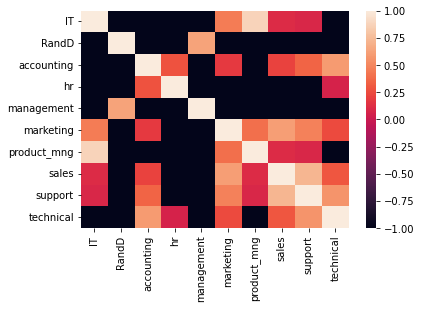

In [21]:
dp_keys = list(dp_indices.keys())
dp_t_mat = np.zeros([len(dp_keys),len(dp_keys)])
for i in range(len(dp_keys)):
    for j in range(len(dp_keys)):
        p_value = ss.ttest_ind(df["left"].iloc[dp_indices[dp_keys[i]]].values,\
            df["left"].iloc[dp_indices[dp_keys[j]]].values)[1]
        if p_value < 0.05:
            dp_t_mat[i][j] = -1 
            ## There is a significant difference between the turnover 
            # rates of the two departments
        else:
            dp_t_mat[i][j] = p_value
sns.heatmap(dp_t_mat,xticklabels=dp_keys,yticklabels=dp_keys)

In [23]:
## Another way to cross-analyze is through pivottables
piv_tb = pd.pivot_table(df,values="left",index=["promotion_last_5years","salary"],\
    columns=["Work_accident"],aggfunc=np.mean)
piv_tb

Work_accident                        0         1
promotion_last_5years salary                    
0                     high    0.082996  0.000000
                      low     0.331728  0.090020
                      medium  0.230683  0.081655
1                     high    0.000000  0.000000
                      low     0.229167  0.166667
                      medium  0.028986  0.023256

<AxesSubplot:xlabel='Work_accident', ylabel='promotion_last_5years-salary'>

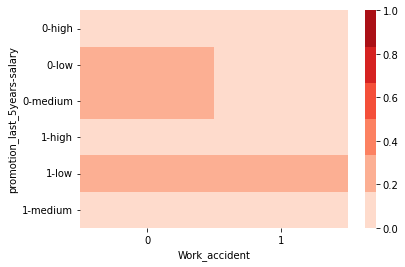

In [26]:
sns.set_context(font_scale=1.5)
sns.heatmap(piv_tb,vmax=1,vmin=0,cmap = sns.color_palette("Reds"))